In [1]:
# data table name: 

import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
database = duckdb.connect('ap_test.db', read_only=False)

entire_sweep_table = database.execute(f'select * from imon_signal_2022_2_10_007_Series9').fetchdf()
database.close()

print(entire_sweep_table)

    

        sweep_1   sweep_2   sweep_3   sweep_4   sweep_5
0     -0.069346 -0.068909 -0.068534 -0.069315 -0.070408
1     -0.069408 -0.068940 -0.068534 -0.069377 -0.070346
2     -0.069533 -0.069127 -0.068503 -0.069440 -0.070346
3     -0.069408 -0.069065 -0.068440 -0.069565 -0.070283
4     -0.069377 -0.069190 -0.068378 -0.069471 -0.070283
...         ...       ...       ...       ...       ...
19995 -0.064286 -0.064879 -0.064660 -0.064723 -0.065191
19996 -0.064192 -0.064879 -0.064473 -0.064754 -0.065410
19997 -0.064192 -0.064723 -0.064567 -0.064817 -0.065316
19998 -0.064254 -0.064629 -0.064504 -0.064879 -0.065504
19999 -0.064411 -0.064817 -0.064504 -0.064817 -0.065504

[20000 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

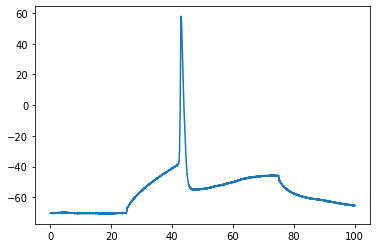

In [3]:

data = entire_sweep_table["sweep_5"].values.tolist()

data = np.array(data)*1000

time = np.linspace(0,100,num = len(data))

fig = plt.plot(time,data)
plt.show


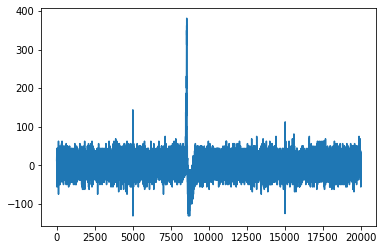

In [6]:

fitting_parameters = {}
# gets a single trace

manual_threshold =10  # * 1000 # where
smoothing_window_length = 19
    
if np.max(data) < manual_threshold:
       print("None detected")
first_derivative = []

#for i in range(len(time) - 1):
#        first_derivative.append(((data[i + 1] - data[i]) / (time[i + 1] - time[i])))


dx = np.diff(time)
dy = np.diff(data)
first_derivative = dy/dx

first_derivative = np.array(first_derivative)
    # first_derivative = first_derivative.astype(float)
    #first_derivative = np.round(first_derivative, 2)

    # if all values are 0 it will return
if all(v == 0 for v in first_derivative):
        # print(self.table_name)
        # print(self._sweep)
        print("returning None")
        #return None

fig = plt.plot(first_derivative)
plt.show()

     

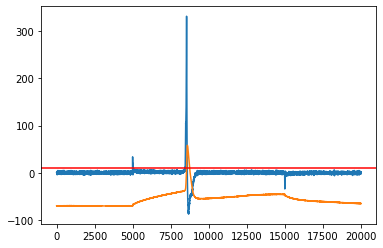

In [14]:
smoothed_first_derivative = first_derivative.copy()

for i in range(len(first_derivative)):

    if i < (len(first_derivative) - smoothing_window_length - 1):

        # print(first_derivative[i])
        # print(first_derivative[i:i+smoothing_window_length])

        smoothed_val = np.mean(first_derivative[i:i + smoothing_window_length])
    else:
        smoothed_val = np.mean(first_derivative[i - smoothing_window_length:i])

    if math.isnan(smoothed_val):
        print("nan error")

    else:
        smoothed_first_derivative[i] = smoothed_val
# print("no error")

smoothed_first_derivative = np.round(smoothed_first_derivative, 2)

#dx = time[1]-time[0]
#print(dx)
#dy = np.diff(smoothed_first_derivative)
#second_derivative = dy/dx
#fig = plt.plot(second_derivative/10, color = 'g')

fig = plt.plot(smoothed_first_derivative)
fig = plt.plot(data)



plt.axhline(manual_threshold,color = 'r')


0.005000250012500625


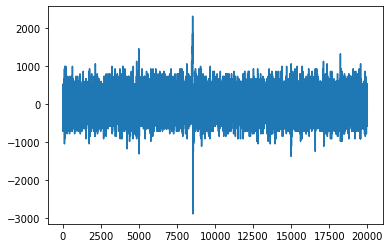

max 1st derivate
8536
Threshold
8442
5000
-70.35221715680741


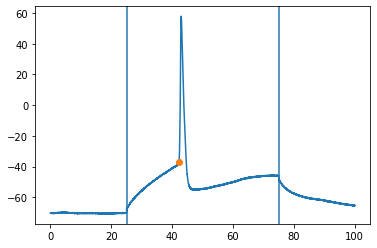

-33.024100561062326


In [5]:
 # returns a tuple of true values and therefore needs to be taken at pos 0
threshold_pos_origin = np.where(smoothed_first_derivative >= manual_threshold)[0]
max_1st_derivate_pos = np.argwhere(smoothed_first_derivative == np.max(smoothed_first_derivative))[0][0]

print("max 1st derivate")
print(max_1st_derivate_pos)
threshold_pos = None

for pos in threshold_pos_origin:
    if np.all(smoothed_first_derivative[pos:max_1st_derivate_pos] > manual_threshold):
        # np.polyfit(smoothed_first_derivative[pos:pos+2*smoothing_window_length,1)
        threshold_pos = pos
        break

print("Threshold")
print(threshold_pos)

# if still none means there was no real AP
if threshold_pos is None:
    print("error")

t_threshold = time[threshold_pos]
v_threshold = data[threshold_pos]

left_bound = np.argmax(time>=25)
print(left_bound)

v_mem = np.mean(data[0:left_bound-1])
print(v_mem)
75
fig = plt.plot(time,data)
plt.plot(t_threshold,v_threshold, marker = 'o')
plt.axvline(25)
plt.axvline(75)
plt.show(manual_threshold)

pre_repolarization = v_mem - v_threshold
print(pre_repolarization)



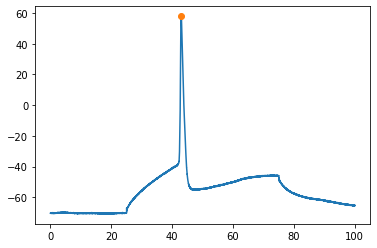

In [6]:
max_amplitude = np.max(data)
max_amplitude_pos = np.argmax(data>= max_amplitude)
t_max_amplitude = time[max_amplitude_pos]

fig = plt.plot(time,data)
fig = plt.plot(t_max_amplitude,max_amplitude, marker = 'o')
plt.show()


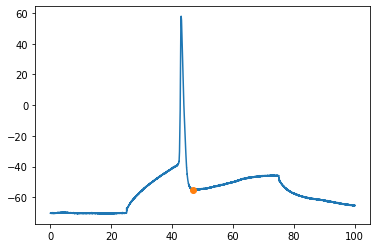

In [7]:
ahp = np.min(data[max_amplitude_pos:15000])
ahp_pos = np.argmax(data[max_amplitude_pos:15000]<=ahp) + max_amplitude_pos
t_ahp = time[ahp_pos]

fig = plt.plot(time,data)
fig = plt.plot(t_ahp,ahp, marker = 'o')
plt.show()


8681
9109


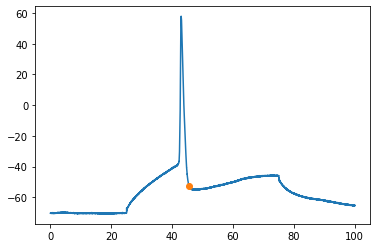

In [24]:
dev_1_min = np.min(smoothed_first_derivative)
pos_dev_1_min = np.where(smoothed_first_derivative ==dev_1_min)[0][0]
print(pos_dev_1_min)
hyperpol_pos = np.where(smoothed_first_derivative[pos_dev_1_min:len(smoothed_first_derivative)]>=0)[0][0]
hyperpol_pos = hyperpol_pos + pos_dev_1_min
print(hyperpol_pos)
fig = plt.plot(time,data)
fig = plt.plot(time[hyperpol_pos],data[hyperpol_pos], marker = 'o')
plt.show()


331.75
max repolarization speed
7.772572926429241


<function matplotlib.pyplot.show(close=None, block=None)>

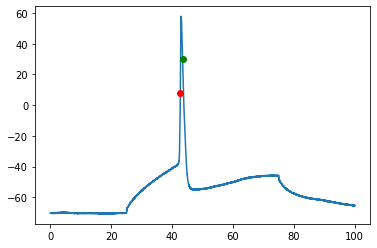

In [8]:
max_1st_derivative_amplitude = np.max(smoothed_first_derivative)
print(max_1st_derivative_amplitude)
pos_max_1st_derivative_amplitude = np.argmax(smoothed_first_derivative>=max_1st_derivative_amplitude)
t_max_1st_derivative_amplitude = time[pos_max_1st_derivative_amplitude]
data_max_1st = data[pos_max_1st_derivative_amplitude]

print("max repolarization speed")
print(max_1st_derivative_amplitude/t_max_1st_derivative_amplitude)

min_1st_derivative_amplitude = np.min(smoothed_first_derivative)
pos_min_1st_derivative_amplitude = np.argmax(smoothed_first_derivative<=min_1st_derivative_amplitude)
t_min_1st_derivative_amplitude = time[pos_min_1st_derivative_amplitude]
data_min_1st = data[pos_min_1st_derivative_amplitude]

fig = plt.plot(time,data)
plt.plot(t_max_1st_derivative_amplitude, data_max_1st, marker = 'o', color = 'r')
plt.plot(t_min_1st_derivative_amplitude, data_min_1st, marker = 'o', color = 'g')
plt.show


0.39001950097505045


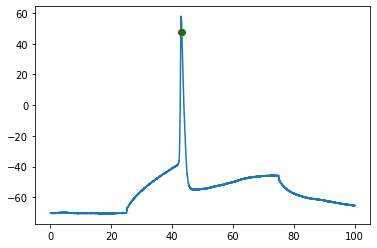

In [9]:
# calculate halfwidth

half_width_amplitude = (max_amplitude - v_threshold) /2 


left_hw_pos = np.argmax(data>=half_width_amplitude)
right_hw_pos = np.argmax(data[max_amplitude_pos:15000]<= half_width_amplitude)  + max_amplitude_pos

time_1st_half_width = time[left_hw_pos]
time_2nd_half_width = time[right_hw_pos]

half_width = time_2nd_half_width - time_1st_half_width
print(half_width)


fig = plt.plot(time,data)
plt.plot(time_1st_half_width, data[left_hw_pos],marker = 'o', color = 'r')
plt.plot(time_2nd_half_width, data[right_hw_pos],marker = 'o', color = 'g')




In [10]:

# only run analysis if there is an action potential, otherwise return nan
if np.max(data) > manual_threshold:
    
    fitting_parameters['Vmem [mV]'] = v_mem
    
    fitting_parameters['Threshold_Amplitude [mV]'] = v_threshold
    fitting_parameters['t_Threshold [ms]'] = t_threshold
    fitting_parameters['delta_t_threshold [ms]'] = t_threshold - 25
    
    fitting_parameters['passive_repolarization [mV]'] = abs(v_mem) - abs(v_threshold)
    
    
    fitting_parameters['AP_Amplitude [mV]'] = max_amplitude
    fitting_parameters['t_AP_Amplitude [ms]'] = t_max_amplitude
    fitting_parameters['delta_ap_threshold [mV]'] = max_amplitude - v_threshold
    fitting_parameters['delta_t_ap_threshold [ms]'] = t_max_amplitude - t_threshold
    
    
    fitting_parameters['AHP_Amplitude [mV]'] = ahp
    fitting_parameters['t_AHP [ms]'] = t_ahp
    fitting_parameters['t_threshold_ahp [ms]'] = t_ahp - t_threshold
    
    
    fitting_parameters['max_first_derivate [mV/ms]'] = max_1st_derivative_amplitude
    fitting_parameters['t_max_1st_derivative [ms]']= t_max_1st_derivative_amplitude


    
    fitting_parameters['min_first_derivate [mV/ms]'] = min_1st_derivative_amplitude
    fitting_parameters['t_min_1st_derivative [ms]']= t_min_1st_derivative_amplitude

    fitting_parameters['dt t_min-t_max [ms]'] = t_min_1st_derivative_amplitude - t_max_1st_derivative_amplitude


    fitting_parameters['AP_with [ms]'] = half_width
    

print(pd.DataFrame.from_dict(fitting_parameters, orient='index'))

                                      0
Vmem [mV]                    -70.352217
Threshold_Amplitude [mV]     -37.328117
t_Threshold [ms]              42.212111
delta_t_threshold [ms]        17.212111
passive_repolarization [mV]   33.024101
AP_Amplitude [mV]             57.944480
t_AP_Amplitude [ms]           42.932147
delta_ap_threshold [mV]       95.272597
delta_t_ap_threshold [ms]      0.720036
AHP_Amplitude [mV]           -55.383053
t_AHP [ms]                    46.982349
t_threshold_ahp [ms]           4.770239
max_first_derivate [mV/ms]   331.750000
t_max_1st_derivative [ms]     42.682134
min_first_derivate [mV/ms]   -87.460000
t_min_1st_derivative [ms]     43.407170
dt t_min-t_max [ms]            0.725036
AP_with [ms]                   0.390020


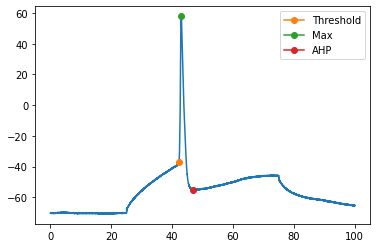

In [11]:
fig = plt.plot(time,data)
plt.plot(t_threshold, v_threshold,marker = 'o',label = "Threshold")
plt.plot(t_max_amplitude, max_amplitude,marker = 'o',label = "Max")
plt.plot(t_ahp, ahp,marker = 'o',label = "AHP")

plt.legend()
plt.show()

